### 1)

a)

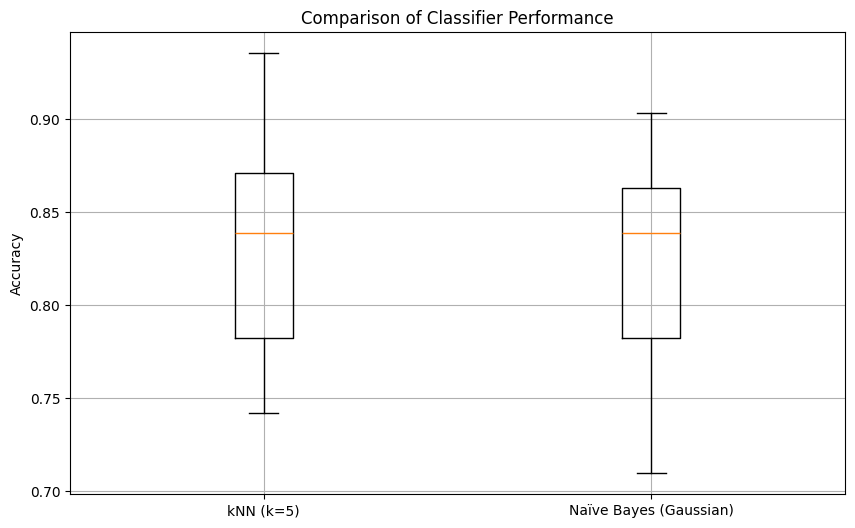

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from scipy.io import arff
from scipy import stats

# Load the dataset
data = arff.loadarff('column_diagnosis.arff')
df = pd.DataFrame(data[0])
# Convert the target column to numeric labels
le = LabelEncoder()
df['class'] = le.fit_transform(df['class'])

# Split the dataset into features and target labels
X = df.drop('class', axis=1)
y = df['class']

# Create classifiers
knn_classifier = KNeighborsClassifier(n_neighbors=5)
nb_classifier = GaussianNB()

# Create 10-fold stratified cross-validation with shuffling
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)

# Perform cross-validation and collect accuracies
knn_accuracies = cross_val_score(knn_classifier, X, y, cv=cv, scoring='accuracy')
nb_accuracies = cross_val_score(nb_classifier, X, y, cv=cv, scoring='accuracy')

# Create a boxplot to compare accuracies
plt.figure(figsize=(10, 6))
plt.boxplot([knn_accuracies, nb_accuracies], labels=['kNN (k=5)', 'Naïve Bayes (Gaussian)'])
plt.title('Comparison of Classifier Performance')
plt.ylabel('Accuracy')
plt.grid()
plt.show()


b)

In [2]:
# Calculate the differences in accuracy scores
differences = knn_accuracies - nb_accuracies

# Perform a paired t-test
t_statistic, p_value = stats.ttest_rel(knn_accuracies, nb_accuracies)

# Define the significance level (alpha)
alpha = 0.05

# Check if the p-value is less than the significance level
if p_value < alpha:
    print("Reject the null hypothesis")
    print("kNN is statistically superior to Naïve Bayes regarding accuracy.")
else:
    print("Fail to reject the null hypothesis")
    print("There is no statistically significant difference between kNN and Naïve Bayes regarding accuracy.")
    
# Print the t-statistic and p-value
print(f"t-statistic: {t_statistic}")
print(f"p-value: {p_value}")

Fail to reject the null hypothesis
There is no statistically significant difference between kNN and Naïve Bayes regarding accuracy.
t-statistic: 0.9214426752509264
p-value: 0.38085618124128184


### 2)

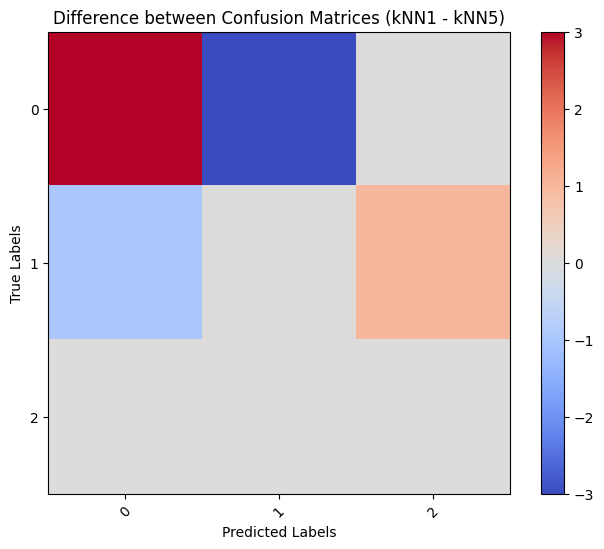

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

le = LabelEncoder()
df['class'] = le.fit_transform(df['class'])

# Split the dataset into features and target labels
X = df.drop('class', axis=1)
y = df['class']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create kNN classifiers with k=1 and k=5
knn1_classifier = KNeighborsClassifier(n_neighbors=1)
knn5_classifier = KNeighborsClassifier(n_neighbors=5)

# Fit the classifiers and make predictions
knn1_classifier.fit(X_train, y_train)
knn5_classifier.fit(X_train, y_train)
y_pred_knn1 = knn1_classifier.predict(X_test)
y_pred_knn5 = knn5_classifier.predict(X_test)

# Compute confusion matrices
conf_matrix_knn1 = confusion_matrix(y_test, y_pred_knn1)
conf_matrix_knn5 = confusion_matrix(y_test, y_pred_knn5)

# Calculate the difference between the two confusion matrices
conf_matrix_diff = conf_matrix_knn1 - conf_matrix_knn5

# Plot the difference matrix
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix_diff, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.title('Difference between Confusion Matrices (kNN1 - kNN5)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.xticks(np.arange(len(le.classes_)), le.classes_, rotation=45)
plt.yticks(np.arange(len(le.classes_)), le.classes_)
plt.show()

### 3)

1- Naïve Bayes assumes that the features are independent from one another. However, that might not be the case in column_diagnosis since most of the times, medical terms or symptoms may be related, so assuming their independence is wrong and thus their dependences are not taken into account by naïve Bayes.

2- In column_diagnosis, Spondylolisthesis is much more common than the Hernia. This means the classes are imbalanced and naïve Bayes might be bias towards the more common class and might struggle to accurately classify the minority class, which can result in a poor predictive performance.

3- Naïve Bayes works best with discrete or categorical data. However, in column_diagnosis all data is numerical, so we would need to discretize the data to use the model to it's fullest potential, but this can lead to information loss and may affect the performance of the model.